# Final Data Analysis

***

## Project Description

For this assignment, you will need to imagine that you are a statistical consultant who has recently been hired by a real estate investment firm based in Ames, Iowa. They have had an intern collect and collate all of the recent house sales in Ames and have put together a large spreadsheet that contains the sale price of each house along with many of its physical features. Your employers want you to take this data and develop a model to predict the selling price of a given home.  They hope to use this information to help assess whether the asking price of a house is higher or lower than the true value of the house.  If the home is undervalued, it may be a good investment for the firm.

Your employers are savvy and have been successfully investing in real estate for a long time but they hope a more model-based approach will help focus their search, improving efficiency and the bottom line. The firm plans to use a combination of your model and industry professional expertise to make its investment decisions. Because of this, the firm is not willing to accept a black box solution - they have specified that they must be able to understand the details of your model, including its strengths and its weaknesses. None of the current employees at the firm have any experience or expertise in statistics, statistical inference or modeling - for example you should not assume they will know what a p-value or a linear regression is. As such you will need to explain all of your approaches in layman's terms throughout this project.

Learner note: In order for you to be able to better assess the quality of the model you will produce, the data have been randomly divided into three separate data sets: a training data set, a test data set, and a validation data set. Initially you will use the training data set; the others will be used later for comparison purposes.

## Part 1 - Exploratory Data Analysis (EDA)

When you first get your data, it's very tempting to immediately begin fitting models and assessing how they perform.  However, before you begin modeling, it's absolutely essential to explore the structure of the data and the relationships between the variables in the data set.

Do a detailed EDA of the ames_train data set, to learn about the structure of the data and the relationships between the variables in the data set (refer to Introduction to Probability and Data, Week 2, for a reminder about EDA if needed). Your EDA should involve creating and reviewing many plots/graphs and considering the patterns and relationships you see. 

After you have explored completely, submit the three graphs/plots that you found most informative during your EDA process, and briefly explain what you learned from each (why you found each informative).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn
from sklearn.feature_selection import SelectKBest, f_regression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats


#import xgboost as xgb
#from xgboost import XGBClassifier, XGBRegressor
#from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("amestrain.csv")

In [3]:
df

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,238.00,Unf,0.00,618.00,856.00,GasA,TA,Y,SBrkr,856,0,0,1.00,0.00,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.00,Unf,2.00,399.00,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.00,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.00,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.00,ALQ,393.00,104.00,1049.00,GasA,TA,Y,SBrkr,1049,0,0,1.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.00,Fin,1.00,266.00,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.00,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,BrkTil,TA,TA,No,ALQ,737.00,Unf,0.00,100.00,837.00,GasA,Ex,Y,SBrkr,1001,0,0,0.00,0.00,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.00,Unf,1.00,216.00,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.00,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.00,Unf,0.00,405.00,405.00,GasA,Gd,Y,SBrkr,717,322,0,0.00,0.00,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.00,Unf,1.00,281.00,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.00,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,TA,No,GLQ,643.00,Unf,0.00,167.00,810.00,GasA,Ex,Y,SBrkr,810,855,0,1.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.00,Fin,2.00,528.00,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,907290250,848,145000,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,662.00,Unf,0.00,186.00,848.00,GasA,Ex,Y,SBrkr,848,0,0,1.00,0.00,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2004.00,RFn,2.00,420.00,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
996,528480150,1576,197000,60,FV,65.00,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,Gd,No,Unf,0.00,Unf,0.00,770.00,770.00,GasA,Ex,Y,SBrkr,778,798,0,0.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2006.00,RFn,2.00,614.00,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial
997,534427010,1728,84900,90,RL,98.00,13260,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.00,TA,TA,CBlock,TA,TA,No,BLQ,1500.00,Unf,0.00,228.00

In [4]:
df["Sale.Condition"].value_counts()

Normal     834
Partial     82
Abnorml     61
Family      17
Alloca       4
AdjLand      2
Name: Sale.Condition, dtype: int64

In [5]:
# Using normal sale conditions

df2 = df[df["Sale.Condition"] == "Normal"]

In [6]:
df2.describe(include='all')

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
count,834.00,834.00,834.00,834.00,834,678.00,834.00,834,53,834,834,834,834,834,834,834,834,834,834,834.00,834.00,834.00,834.00,834,834,834,834,830,830.00,834,834,834,814,814,813,814,834.00,814,834.00,834.00,834.00,834,834,834,834,834.00,834.00,834.00,834.00,834.00,834.00,834.00,834.00,834.00,834,834.00,834,834.00,420,799,798.00,798,834.00,834.00,798,798,834,834.00,834.00,834.00,834.00,834.00,834.00,3,179,28,834.00,834.00,834.00,834,834
unique,NaN,NaN,NaN,NaN,6,NaN,NaN,2,2,4,4,1,5,3,27,9,5,5,7,NaN,NaN,NaN,NaN,5,5,12,12,4,NaN,4,4,5,5,5,4,6,NaN,6,NaN,NaN,NaN,5,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,6,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,1
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,CBlock,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,TA,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,NaN,NaN,656,NaN,NaN,832,28,522,757,834,590,800,140,732,825,687,422,NaN,NaN,NaN,NaN,654,822,262,259,516,NaN,540,711,381,389,763,538,236,NaN,711,NaN,NaN,NaN,824,407,789,776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446,NaN,777,NaN,201,505,NaN,382,NaN,NaN,757,768,745,NaN,NaN,NaN,NaN,NaN,NaN,1,105,24,NaN,NaN,NaN,797,834
mean,713844612.59,1450.05,174622.27,57.86,NaN,68.51,10227.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,5.64,1970.00,1983.03,NaN,NaN,NaN,NaN,NaN,95.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453.26,NaN,52.44,517.70,1023.39,NaN,NaN,NaN,NaN,1127.31,318.22,4.52,0.44,0.06,1.50,0.38,2.81,1.04,NaN,6.27,NaN,0.59,NaN,NaN,1975.94,NaN,1.72,460.87,NaN,NaN,NaN,93.18,45.31,24.00,3.19,14.87,1.75,NaN,NaN,NaN,53.12,6.16,2007.84,NaN,NaN
std,188932275.99,491.48,72269.79,43.33,NaN,24.15,10353.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34,1.10,29.05,20.15,NaN,NaN,NaN,NaN,NaN,176.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,423.50,NaN,174.13,405.71,401.13,NaN,NaN,NaN,NaN,360.03,421.90,51.24,0.52,0.24,0.54,0.50,0.81,0.19,NaN,1.53,NaN,0.66,NaN,NaN,24.73,NaN,0.74,205.03,NaN,NaN,NaN,125.72,61.49,60.92,29.77,54.28,33.37,NaN,NaN,NaN,611.09,2.66,1.29,NaN,NaN
min,526302030.00,334.00,39300.00,20.00,NaN,21.00,1470.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1872.00,1950.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,334.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,NaN,2.00,NaN,0.00,NaN,NaN,1900.00,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN
25%,531458660.00,1077.25,129000.00,20.00,NaN,56.00,7205.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,1954.00,1965.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,209.00,784.00,NaN,NaN,NaN,NaN,864.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,NaN,5.00,NaN,0.00,NaN,NaN,1960.00,NaN,1.00,308.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,5.00,2007.00,NaN,NaN
50%,535454145.00,1383.00,155500.00,50.00,NaN,69.00

In [7]:
df2.shape

(834, 81)

In [8]:
df2.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

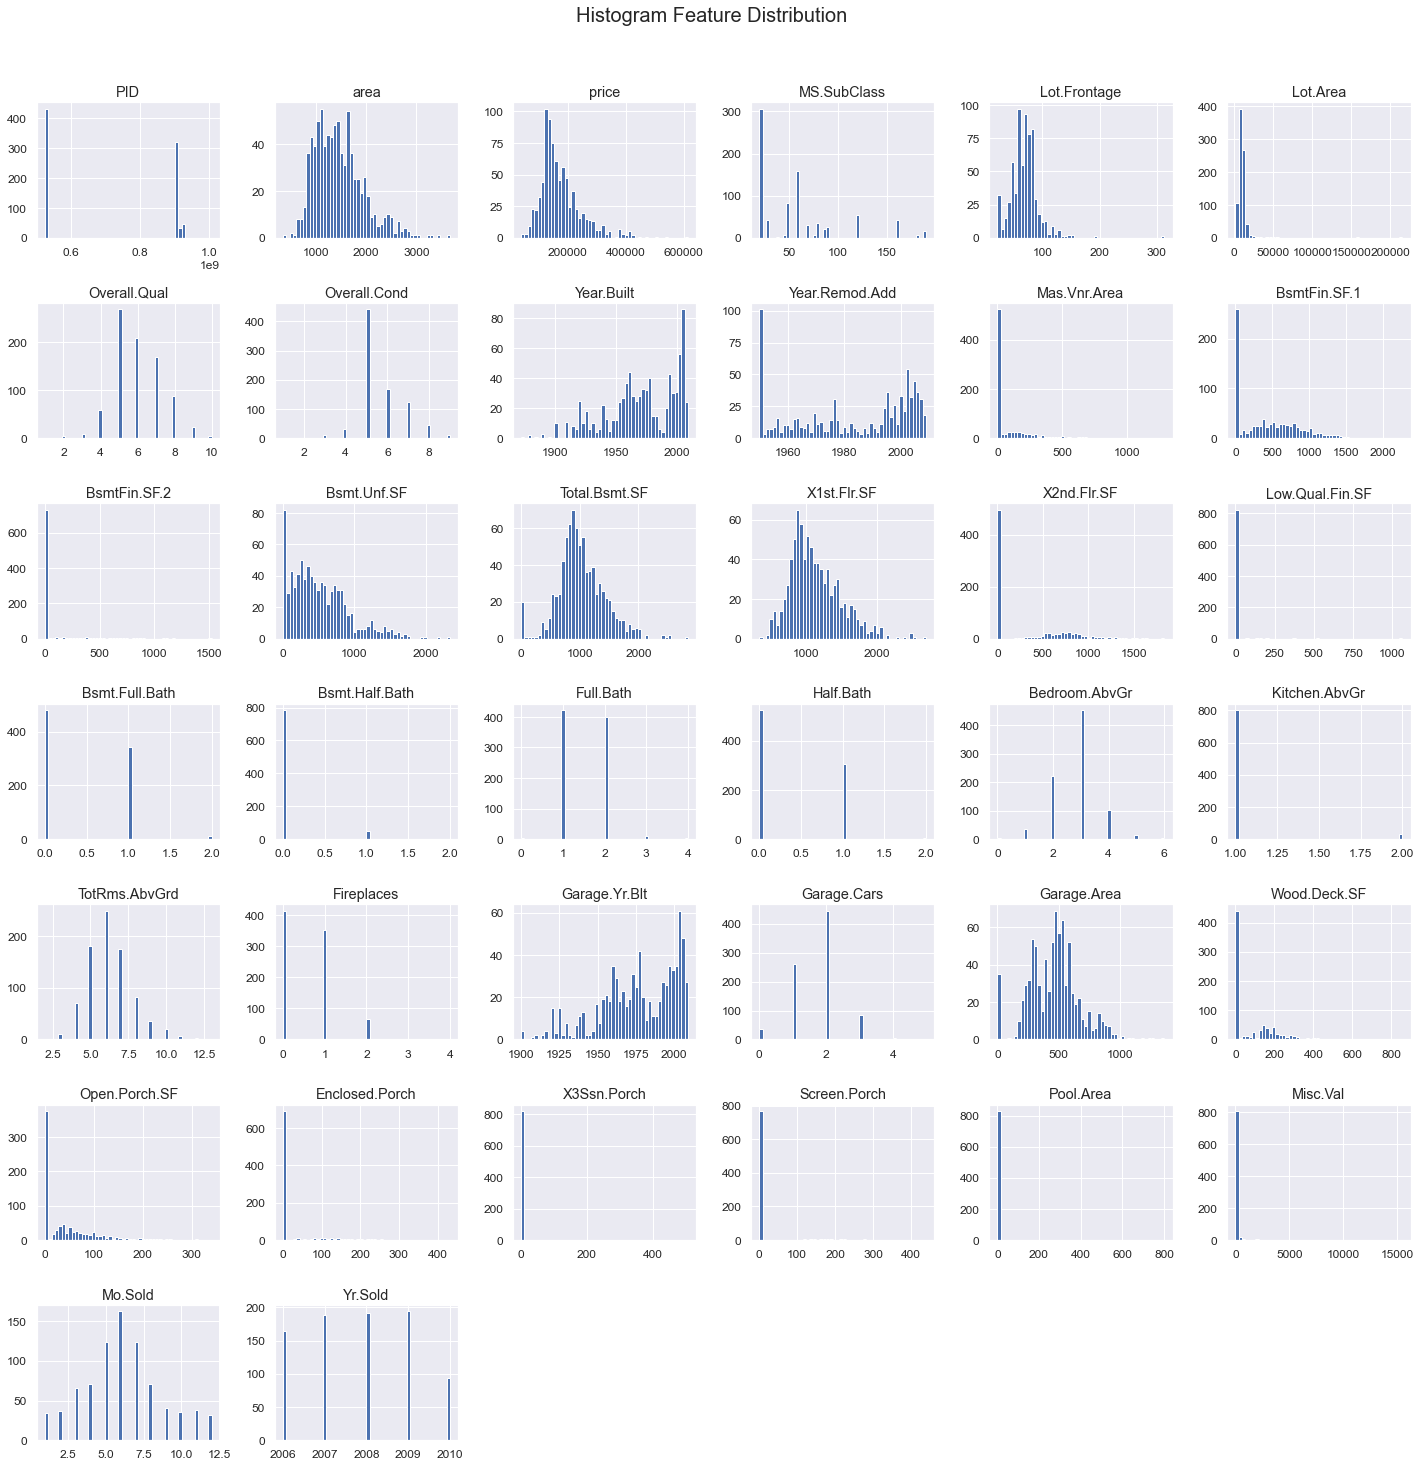

In [9]:
df2.hist(bins=50, figsize=(20,20))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

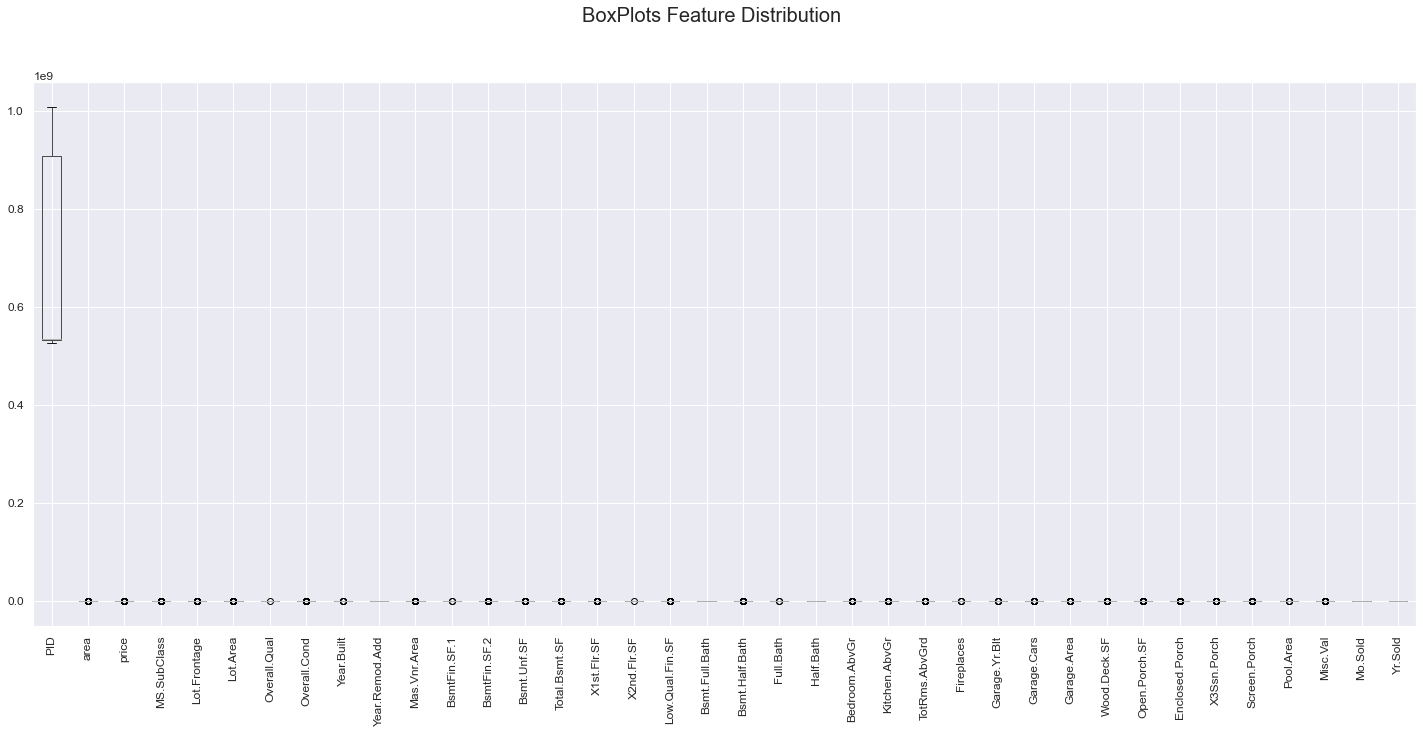

In [10]:
df2.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
df2.isnull().sum().sort_values(ascending=False).head(20)

Pool.QC           831
Misc.Feature      806
Alley             781
Fence             655
Fireplace.Qu      414
Lot.Frontage      156
Garage.Finish      36
Garage.Yr.Blt      36
Garage.Qual        36
Garage.Cond        36
Garage.Type        35
Bsmt.Exposure      21
Bsmt.Qual          20
BsmtFin.Type.2     20
Bsmt.Cond          20
BsmtFin.Type.1     20
Mas.Vnr.Type        4
Mas.Vnr.Area        4
Bedroom.AbvGr       0
Half.Bath           0
dtype: int64

In [12]:
df2.groupby(["Neighborhood"])["price"].median()

Neighborhood
Blmngtn   192000.00
Blueste   123900.00
BrDale    100500.00
BrkSide   125250.00
ClearCr   187500.00
CollgCr   195000.00
Crawfor   198000.00
Edwards   125400.00
Gilbert   184000.00
Greens    212625.00
GrnHill   280000.00
IDOTRR    103000.00
MeadowV    85750.00
Mitchel   160000.00
NAmes     140000.00
NPkVill   142100.00
NWAmes    190000.00
NoRidge   290000.00
NridgHt   305500.00
OldTown   120000.00
SWISU     129500.00
Sawyer    135000.00
SawyerW   181000.00
Somerst   220000.00
StoneBr   255500.00
Timber    232500.00
Veenker   217500.00
Name: price, dtype: float64

In [13]:
graph1 = pd.DataFrame(df2.groupby(["Neighborhood"])["price"].median())
graph1

,price
Neighborhood,
Blmngtn,192000.00
Blueste,123900.00
BrDale,100500.00
BrkSide,125250.00
ClearCr,187500.00
CollgCr,195000.00
Crawfor,198000.00
Edwards,125400.00
Gilbert,184000.00


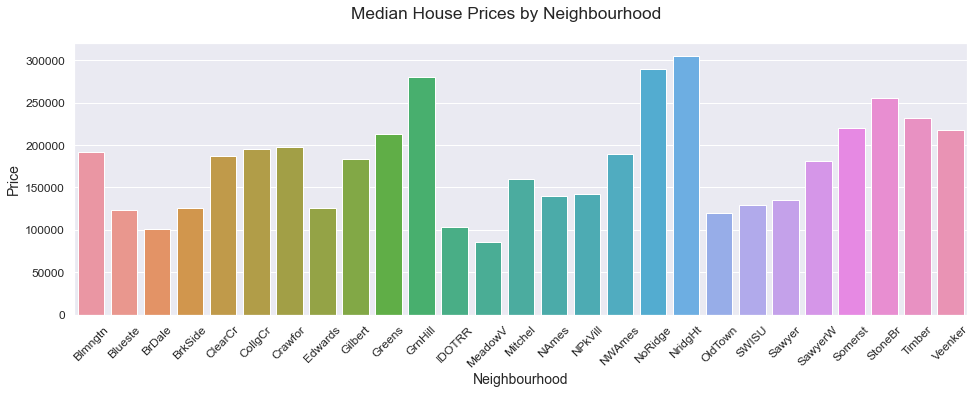

In [14]:
fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
fig.suptitle('Median House Prices by Neighbourhood')

sns.barplot(x=graph1.index, y=graph1.price, data=graph1)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("Neighbourhood")
ax.set_ylabel("Price")
plt.show()

Certain neighbourhoods can fetch high prices as shown in bar graph above.

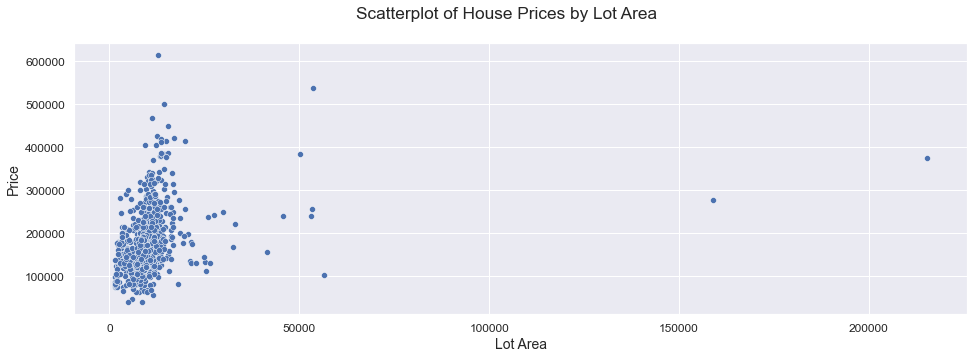

In [15]:
fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
fig.suptitle('Scatterplot of House Prices by Lot Area')

sns.scatterplot(x=df2["Lot.Area"], y=df2.price, data=df2, ax=ax)
#ax.tick_params('x', labelrotation=45)
ax.set_xlabel("Lot Area")
ax.set_ylabel("Price")

plt.show()

Most of Lot Area sizes less than 25000 square feet fetch higher prices.

In [16]:
df2["Age"] = 2021 - df2["Year.Built"]

In [17]:
df2.head()

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,Age
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,238.00,Unf,0.00,618.00,856.00,GasA,TA,Y,SBrkr,856,0,0,1.00,0.00,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.00,Unf,2.00,399.00,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,82
1,905476230,1049,139500,120,RL,42.00,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.00,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.00,ALQ,393.00,104.00,1049.00,GasA,TA,Y,SBrkr,1049,0,0,1.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.00,Fin,1.00,266.00,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,37
2,911128020,1001,124900,30,C (all),60.00,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.00,Gd,TA,BrkTil,TA,TA,No,ALQ,737.00,Unf,0.00,100.00,837.00,GasA,Ex,Y,SBrkr,1001,0,0,0.00,0.00,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.00,Unf,1.00,216.00,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,91
3,535377150,1039,114000,70,RL,80.00,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.00,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.00,Unf,0.00,405.00,405.00,GasA,Gd,Y,SBrkr,717,322,0,0.00,0.00,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.00,Unf,1.00,281.00,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121
4,534177230,1665,227000,60,RL,70.00,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00,Gd,TA,PConc,Gd,TA,No,GLQ,643.00,Unf,0.00,167.00,810.00,GasA,Ex,Y,SBrkr,810,855,0,1.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.00,Fin,2.00,528.00,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,20


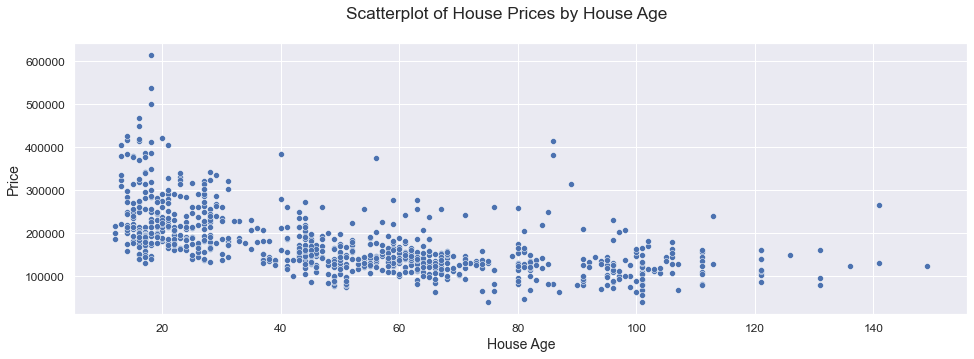

In [18]:
fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
fig.suptitle('Scatterplot of House Prices by House Age')

sns.scatterplot(x=df2["Age"], y=df2.price, data=df2, ax=ax)
#ax.tick_params('x', labelrotation=45)
ax.set_xlabel("House Age")
ax.set_ylabel("Price")

plt.show()

Using price cut off point at $400000, most houses preferred are not more than 40 years old.

## Part 2 - Development and assessment of an initial model, following a semi-guided process of analysis

### Section 2.1 An Initial Model

In building a model, it is often useful to start by creating a simple, intuitive initial model based on the results of the exploratory data analysis. (Note: The goal at this stage is **not** to identify the "best" possible model but rather to choose a reasonable and understandable starting point. Later you will expand and revise this model to create your final model.

Based on your EDA, select *at most* 10 predictor variables from “ames_train” and create a linear model for `price` (or a transformed version of price) using those variables. Provide the *R code* and the *summary output table* for your model, a *brief justification* for the variables you have chosen, and a *brief discussion* of the model results in context (focused on the variables that appear to be important predictors and how they relate to sales price).

### Correlation

In [19]:
df2.corr()

,PID,area,price,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,Age
PID,1.00,-0.12,-0.23,0.01,-0.13,0.05,-0.21,0.07,-0.30,-0.16,-0.18,-0.16,0.00,-0.01,-0.18,-0.16,0.00,0.01,-0.10,-0.01,-0.11,-0.17,0.00,0.08,-0.08,-0.13,-0.23,-0.18,-0.20,-0.06,-0.08,0.16,-0.06,-0.06,-0.05,-0.04,-0.06,-0.01,0.30
area,-0.12,1.00,0.75,0.08,0.33,0.23,0.59,-0.12,0.25,0.36,0.41,0.16,-0.06,0.28,0.43,0.54,0.69,0.05,0.07,-0.06,0.67,0.45,0.58,0.14,0.81,0.50,0.28,0.52,0.47,0.34,0.30,-0.01,-0.01,0.07,0.13,-0.03,0.05,0.01,-0.25
price,-0.23,0.75,1.00,-0.07,0.38,0.27,0.80,-0.12,0.56,0.53,0.53,0.47,-0.01,0.18,0.67,0.67,0.31,-0.06,0.33,-0.06,0.56,0.30,0.22,-0.09,0.53,0.52,0.53,0.65,0.62,0.43,0.33,-0.15,-0.01,0.10,0.09,-0.02,0.05,0.02,-0.56
MS.SubClass,0.01,0.08,-0.07,1.00,-0.41,-0.17,0.06,-0.13,0.09,0.06,-0.01,-0.08,-0.07,-0.10,-0.22,-0.23,0.29,-0.01,-0.03,-0.03,0.14,0.17,-0.06,0.27,0.00,0.03,0.13,0.03,-0.04,-0.04,-0.02,-0.07,-0.05,-0.03,0.01,-0.05,-0.00,-0.04,-0.09
Lot.Frontage,-0.13,0.33,0.38,-0.41,1.00,0.40,0.21,-0.04,0.12,0.09,0.25,0.18,0.07,0.11,0.32,0.46,-0.02,-0.04,0.16,-0.03,0.16,0.02,0.30,0.00,0.36,0.23,0.07,0.31,0.35,0.14,0.08,-0.05,0.04,0.09,0.06,0.02,0.01,0.00,-0.12
Lot.Area,0.05,0.23,0.27,-0.17,0.40,1.00,0.07,-0.04,-0.01,0.03,0.09,0.16,0.11,0.01,0.23,0.28,0.03,-0.00,0.12,0.06,0.12,-0.01,0.15,-0.01,0.21,0.22,-0.03,0.16,0.16,0.10,0.05,-0.02,0.01,0.04,0.02,0.03,-0.00,-0.01,0.01
Overall.Qual,-0.21,0.59,0.80,0.06,0.21,0.07,1.00,-0.12,0.57,0.54,0.41,0.26,-0.06,0.27,0.52,0.47,0.30,-0.09,0.19,-0.04,0.53,0.29,0.14,-0.11,0.41,0.43,0.56,0.58,0.51,0.31,0.30,-0.16,-0.00,0.06,0.05,-0.01,0.05,0.01,-0.57
Overall.Cond,0.07,-0.12,-0.12,-0.13,-0.04,-0.04,-0.12,1.00,-0.38,0.05,-0.14,-0.08,-0.00,-0.12,-0.20,-0.16,0.00,-0.02,-0.07,0.07,-0.24,-0.09,0.01,-0.08,-0.05,-0.08,-0.35,-0.22,-0.20,0.03,-0.11,0.08,0.02,0.05,-0.06,0.08,0.05,-0.03,0.38
Year.Built,-0.30,0.25,0.56,0.09,0.12,-0.01,0.57,-0.38,1.00,0.57,0.32,0.31,0.01,0.07,0.41,0.30,0.05,-0.12,0.24,-0.06,0.47,0.28,-0.01,-0.14,0.11,0.21,0.85,0.53,0.47,0.28,0.23,-0.40,-0.01,-0.04,0.01,-0.03,0.00,0.03,-1.00
Year.Remod.Add,-0.16,0.36,0.53,0.06,0.09,0.03,0.54,0.05,0.57,1.00,0.22,0.14,-0.06,0.15,0.27,0.26,0.21,-0.08,0.12,-0.07,0.46,0.25,0.06,-0.15,0.22,0.15,0.60,0.41,0.34,0.27,0.20,-0.24,0.01,-0.04,-0.01,0.02,0.03,0.07,-0.57


In [20]:
df2.corr()["price"].sort_values()

Age               -0.56
PID               -0.23
Enclosed.Porch    -0.15
Overall.Cond      -0.12
Kitchen.AbvGr     -0.09
MS.SubClass       -0.07
Bsmt.Half.Bath    -0.06
Low.Qual.Fin.SF   -0.06
Misc.Val          -0.02
BsmtFin.SF.2      -0.01
X3Ssn.Porch       -0.01
Yr.Sold            0.02
Mo.Sold            0.05
Pool.Area          0.09
Screen.Porch       0.10
Bsmt.Unf.SF        0.18
Bedroom.AbvGr      0.22
Lot.Area           0.27
Half.Bath          0.30
X2nd.Flr.SF        0.31
Open.Porch.SF      0.33
Bsmt.Full.Bath     0.33
Lot.Frontage       0.38
Wood.Deck.SF       0.43
BsmtFin.SF.1       0.47
Fireplaces         0.52
Mas.Vnr.Area       0.53
Garage.Yr.Blt      0.53
TotRms.AbvGrd      0.53
Year.Remod.Add     0.53
Year.Built         0.56
Full.Bath          0.56
Garage.Area        0.62
Garage.Cars        0.65
X1st.Flr.SF        0.67
Total.Bsmt.SF      0.67
area               0.75
Overall.Qual       0.80
price              1.00
Name: price, dtype: float64

In [21]:
df2.columns

Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive',
       'Wo

### Select Age, Overall.Qual, Lot.Area, Total.Bsmt.SF, X1st.Flr.SF, 
### Garage.Cars, Garage.Area, Full.Bath, TotRms.AbvGrd, Fireplaces, price

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|Age |House Age	|
|Overall.Qual |	Rates the overall material and finish of the house|
|Lot.Area | Lot size in square feet	|
|Total.Bsmt.SF | Total square feet of basement area	|
|X1st.Flr.SF |	First Floor square feet |
|Garage.Cars | Size of garage in car capacity	|
|Garage.Area | Size of garage in square feet	|
|Full.Bath | Full bathrooms above grade	|
|TotRms.AbvGrd | Total rooms above grade (does not include bathrooms)	|
|Fireplaces | Number of fireplaces	|
| price |Sale price $$	|

In [22]:
df3 = df2[['Age','Lot.Area','Total.Bsmt.SF','X1st.Flr.SF','Garage.Cars','Garage.Area',
           'TotRms.AbvGrd','Full.Bath','Fireplaces','Overall.Qual','price']]

In [23]:
df3

,Age,Lot.Area,Total.Bsmt.SF,X1st.Flr.SF,Garage.Cars,Garage.Area,TotRms.AbvGrd,Full.Bath,Fireplaces,Overall.Qual,price
0,82,7890,856.00,856,2.00,399.00,4,1,1,6,126000
1,37,4235,1049.00,1049,1.00,266.00,5,2,0,5,139500
2,91,6060,837.00,1001,1.00,216.00,5,1,0,5,124900
3,121,8146,405.00,717,1.00,281.00,6,1,0,4,114000
4,20,8400,810.00,810,2.00,528.00,6,2,0,8,227000
...,...,...,...,...,...,...,...,...,...,...,...
993,61,14585,1144.00,1429,2.00,572.00,7,1,2,6,181900
994,25,11787,1379.00,1383,3.00,834.00,8,2,1,7,315750
995,17,4426,848.00,848,2.00,420.00,3,1,0,6,145000
998,52,9364,663.00,663,1.00,299.00,7,1,0,6,158000


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            834 non-null    int64  
 1   Lot.Area       834 non-null    int64  
 2   Total.Bsmt.SF  834 non-null    float64
 3   X1st.Flr.SF    834 non-null    int64  
 4   Garage.Cars    834 non-null    float64
 5   Garage.Area    834 non-null    float64
 6   TotRms.AbvGrd  834 non-null    int64  
 7   Full.Bath      834 non-null    int64  
 8   Fireplaces     834 non-null    int64  
 9   Overall.Qual   834 non-null    int64  
 10  price          834 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 78.2 KB


In [25]:
df3.columns

Index(['Age', 'Lot.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Garage.Cars', 'Garage.Area', 'TotRms.AbvGrd', 'Full.Bath', 'Fireplaces', 'Overall.Qual', 'price'], dtype='object')

In [26]:
y = df3[['price']]
X = df3[['Age', 'Lot.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Garage.Cars', 'Garage.Area', 
        'TotRms.AbvGrd', 'Full.Bath', 'Fireplaces', 'Overall.Qual']]

In [27]:
X = sm.add_constant(X)

In [28]:
model = sm.OLS(y,X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     372.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.41e-297
Time:                        19:07:04   Log-Likelihood:                -9800.8
No. Observations:                 834   AIC:                         1.962e+04
Df Residuals:                     823   BIC:                         1.968e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.776e+04   8146.560     -9.546      0.000   -9.38e+04   -6.18e+04
Age            -303.8242     51.643     -5.883      0.000    -405.192    -202.456
Lot.Area          0.6996      0.110      6.335      0.000       0.483       0.916
Total.Bsmt.SF    27.7163      4.783      5.795      0.000      18.328      37.105
X1st.Flr.SF      22.3023      5.464      4.082      0.000      11.577      33.027
Garage.Cars     713.9201   3531.180      0.202      0.840   -6217.258    7645.099
Garage.Area      43.1257     11.960      3.606      0.000      19.649      66.602
TotRms.AbvGrd  7225.6529    939.084      7.694      0.000    5382.371    9068.935
Full.Bath      1590.2696   2812.940      0.565      0.572   -3931.112    7111.651
Fireplaces     1.145e+04   1920.599      5.960      0.000    7676.086    1.52e+04
Overall.Qual   2.195e+04   1207.344     18.184      0.000    1.96e+04    2.43e+04
==============================================================================
Omnibus:                      279.372   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1840.513
Skew:                           1.355   Prob(JB):                         0.00
Kurtosis:                       9.754   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the model summary results, the R2 score is quite high around 0.82.

I used to calculate the correlations and decide on important variables like age, bathrooms, quality, fireplaces, garage and area size to determine house prices. This may not mean to imply causation.

Only Garage Cars and Full Bathroom p-values is more than 0.05, means I can drop these later.

### Create and save processed dataset

In [30]:
df3.to_csv("train.csv",index=False)

### Section 2.2 Model Selection

Now either using `BAS` another stepwise selection procedure choose the "best" model you can, using your initial model as your starting point. Try at least two different model selection methods and compare their results. Do they both arrive at the same model or do they disagree? What do you think this means?

### Stepwise Method

In [31]:
## getting column names
x_columns = ['Age', 'Lot.Area', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'Garage.Cars', 'Garage.Area', 
        'TotRms.AbvGrd', 'Full.Bath', 'Fireplaces', 'Overall.Qual']
y = df3["price"]

In [32]:
def get_stats():
    x = df3[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
    
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              2725.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:07:04   Log-Likelihood:                         -9844.5
No. Observations:                 834   AIC:                                  1.971e+04
Df Residuals:                     824   BIC:                                  1.976e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [33]:
x_columns.remove("Full.Bath")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              3030.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:07:04   Log-Likelihood:                         -9844.8
No. Observations:                 834   AIC:                                  1.971e+04
Df Residuals:                     825   BIC:                                  1.975e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

### Univariate linear regression tests returning F-statistic and p-values

In [34]:
F, p = sklearn.feature_selection.f_regression(X,y)

In [35]:
#F-Scores
F

array([          nan,  370.94601078,   66.66094109,  691.8378471 ,
        668.99560908,  625.03218874,  528.95269607,  330.47155264,
        379.31849357,  309.15046615, 1429.06661093])

In [36]:
#P-values
p

array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [37]:
-----------------------------------------------------

SyntaxError: invalid syntax (Temp/ipykernel_10096/1493939473.py, line 1)

### Train Test Split

In [ ]:
X = df.iloc[:,:]
y = df.iloc[:,:]

In [ ]:
df.shape

### Treat Imbalance Data

In [ ]:
y.value_counts()

In [ ]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [ ]:
new_X, new_y = ros.fit_resample(X, y)

In [ ]:
new_y[].value_counts()

In [ ]:
new_X

### Train Test Split Cont'd

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Train Test Split to create Train, Validation and Test Set

In [ ]:
#Set test set size
X_df, X_test, y_df, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0) 

In [ ]:
X_df.shape, X_test.shape, y_df.shape, y_test.shape

In [ ]:
X_train, X_val = train_test_split(X_df, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_val.shape

## Feature Selection

### Using SelectKBest

In [ ]:
X_new = SelectKBest(f_regression, k=10).fit_transform(X_train,y_train)

In [ ]:
X_new[0:5]

### Univariate Feature Selection

In [ ]:
select_feature = SelectKBest(chi2, k=10).fit(X_train,y_train)

In [ ]:
select_feature.scores_

### Recursive Feature Elimination

In [ ]:
rfe = RFE(estimator=XGBRegressor(),n_features_to_select=10,verbose=1, step=1)

In [ ]:
rfe.fit(X_train,y_train)

In [ ]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':rfe.ranking_}   

In [ ]:
selected_rfe_features

### Recursive Feature Elimnation with Cross Validation

In [ ]:
rfecv = RFECV(estimator=XGBRegressor(), cv=5,scoring="neg_mean_squared_error",verbose=1, step=1)

In [ ]:
rfecv.fit(X_train,y_train)

In [ ]:
print("Optimal no of features:", rfecv.n_features_)

In [ ]:
print("Best features:", rfecv.support_)

## Feature Scaling

In [ ]:
X_train

In [ ]:
encoder = LabelEncoder()

In [ ]:
scaler = StandardScaler()

In [ ]:
minmax = MinMaxScaler()

In [ ]:
ohe = OneHotEncoder()

In [ ]:
X_train_scaled = minmax.fit_transform(X_train)

In [ ]:
X_test_scaled = minmax.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

### Model Training

### Using PyCaret

In [ ]:
exp_reg = setup(data = df, target = '', session_id=0, normalize=True) 

In [ ]:
compare_models(exclude=['catboost','lightgbm','lda','qda','mlp','ada','nb','ridge','rbfsvm','svm'],fold=5) #For Classifier

In [ ]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','svm','knn','dt','rf',
                        'et','ada','gbr','mlp','xgboost','lightgbm','catboost'],fold=5) # For Regressor

In [ ]:
model_selected = create_model('catboost')

In [ ]:
print(model_selected)

In [ ]:
tuned_model = tune_model(catboost, optimize='mse')

In [ ]:
print(tuned_model)

In [ ]:
plot_model(tuned_model)

In [ ]:
plot_model(tuned_model, plot = 'error')

In [ ]:
plot_model(tuned_model, plot='feature')

In [ ]:
interpret_model(tuned_model)

In [ ]:
evaluate_model(tuned_model)

In [ ]:
predict_model(tuned_model)

In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

## Using Regression or Classification Models

In [ ]:
reg_model

In [ ]:
classi_model

### K-Fold Cross-Validation (Generalization Performance)

In [ ]:
lasso = Lasso(random_state=0)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
lasso_cv = cross_validate(estimator=lasso, X=X_train_scaled, y=y_train, scoring="neg_root_mean_squared_error",
                            cv=kf, n_jobs=-1,return_train_score=True)

In [ ]:
lasso_cv

In [ ]:
np.mean(lasso_cv["train_score"]), np.std(lasso_cv["train_score"])

In [ ]:
np.mean(lasso_cv["test_score"]), np.std(lasso_cv["test_score"])

## Using TPOT

In [ ]:
# tpot = TPOTClassifier(generations=3,population_size=10,scoring='accuracy', cv=5, verbosity=2, random_state=0, 
#                       early_stop=1)

In [ ]:
# tpot.fit(X_train,y_train)

In [ ]:
# tpot.score(X_test, y_test)

### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [ ]:
model = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [ ]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='softmax:multi')

In [ ]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [ ]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='')

In [ ]:
randm.fit(X, y)

In [ ]:
randm.best_estimator_

In [ ]:
randm.best_score_

In [ ]:
randm.best_params_

### Final Model

In [ ]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [ ]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [ ]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=100, objective='softmax:multi')

In [ ]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=10)

In [ ]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

In [ ]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='mlogloss',early_stopping_rounds=10)

In [ ]:
y_pred = xgbmodel.predict(X_test_scaled)

In [ ]:
y_pred

### Model Evaluation

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
plot_roc_curve(xgbmodel,X_test,y_test)
plt.show()

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,y_pred)
r2score

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted", fontsize=20)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Plot Feature Importances

In [ ]:
rf.feature_importances_

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

In [ ]:
feat_importances

In [ ]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### The permutation based importance

In [ ]:
perm_importance = permutation_importance(rf,X_test,y_test, random_state=0, scoring='neg_mean_squared_error')

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10,10))
plt.title("Permutation-based Importance")
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

### Compute Importance from SHAP Values

In [ ]:
explainer = shap.TreeExplainer(rf)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_test)

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [ ]:
X.columns

In [ ]:
xgbmodel.get_booster().feature_names = [X.columns]

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

In [ ]:
xgb.to_graphviz(xgbmodel,num_trees=100)

Example:

f = 'gain'

XGBClassifier.get_booster().get_score(importance_type= f)

### Plot Tree

In [ ]:
X.columns

In [ ]:
plt.figure(figsize=(40,25))
plot_tree(treeclf, feature_names=X.columns,class_names=['0','1'], fontsize=14, filled=True)
plt.show()

### Cross-Validation

In [ ]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='')

In [ ]:
cv.mean()

### Using XGBoost (API)

In [ ]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)

In [ ]:
params = {'n_estimators':,
          'learning_rate':,
          'max_depth':,
          'objective': '',
          'num_class': ,
          'seed': 0,
          'eval_metric':''}

In [ ]:
xgbmodel = xgb.train(params=params,dtrain=dtrain,num_boost_round=100,evals=[(dtest,"Test")],
                     early_stopping_rounds=10)

In [ ]:
y_pred = xgbmodel.predict(dtest)

In [ ]:
y_pred

### Cross-Validation (API)

In [ ]:
cv = xgb.cv(params=params,
            dtrain=dtrain,
            num_boost_round=100,
            nfold=5,
            stratified=False,
            folds=None,
            metrics=('merror'),
            obj=None,
            feval=None,
            maximize=False,
            early_stopping_rounds=10,
            fpreproc=None,
            as_pandas=True,
            verbose_eval=None,
            show_stdv=True,
            seed=0,
            callbacks=None,
            shuffle=True,)

In [ ]:
cv

In [ ]:
cv['test-merror-mean'].min()

### Model Evaluation (Classification)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(xgbmodel,X_test_scaled,y_test,values_format='.4g',ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
plot_roc_curve(xgbmodel,X_test,y_test)
plt.show()

### Model Evaluation (Regression)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,y_pred)
r2score

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Table Formatted View

In [ ]:
table = X_test.copy()

In [ ]:
table["True Value"] = y_test.copy()

In [ ]:
table["Predicted"] = np.round(lr_pred,2)

In [ ]:
table

### Cross-Validation

In [ ]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

In [ ]:
cv.mean()

### Feature Selection

In [ ]:
df.columns

In [ ]:
df2 = df[['']]

In [ ]:
df2

In [ ]:
X = df2.iloc[:,0:7]
y = df2.iloc[:,7]

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
xgbmodel2 = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [ ]:
xgbmodel2 = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [ ]:
xgbmodel2.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

In [ ]:
xgbmodel2.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

In [ ]:
y_pred = xgbmodel2.predict(X_test)

In [ ]:
y_pred

In [ ]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgbmodel2,X_test,y_test,values_format='4g',ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
plot_roc_curve(xgbmodel2,X_test,y_test)
plt.show()

### Model Prediction

In [ ]:
testdata = pd.read_csv()

In [ ]:
answer = xgbmodel.predict(testdata)

In [ ]:
answer

### Model Tuning

### Using RandomSearchCV

In [ ]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [ ]:
model = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [ ]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [ ]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, 
                           n_jobs=-1, scoring='')

In [ ]:
randm.fit(X, y)

In [ ]:
randm.best_estimator_

In [ ]:
randm.best_score_

In [ ]:
randm.best_params_

### Using GridSearchCV

In [ ]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [ ]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [ ]:
grids = GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',
                     n_jobs=-1,cv=5,verbose=1,return_train_score=True)

In [ ]:
grids.fit(X,y)

In [ ]:
grids.best_estimator_

### Final Model

In [ ]:
xgbnew = XGBClassifier(random_state=0, n_estimators=, objective='binary:logistic',max_depth=,
                      gamma=, min_child_weight=,learning_rate=,subsample=,colsample_bytree=)

In [ ]:
xgbnew = XGBRegressor(random_state=0, n_estimators=, objective='binary:logistic',max_depth=,
                      gamma=, min_child_weight=,learning_rate=,subsample=,colsample_bytree=)

In [ ]:
xgbnew.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

In [ ]:
y_pred = xgbnew.predict(X_test)

In [ ]:
y_pred

In [ ]:
fig , ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(xgbnew,X_test,y_test,values_format='4g',ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
plot_roc_curve(xgbnew,X_test,y_test)
plt.show()

### Save the Model

In [ ]:
filename = 'model.sav'
dump(xgbnew,open(filename,'wb'))

### Load the Model

In [ ]:
loaded_model = load(open(filename,'rb'))

In [ ]:
loaded_model

#### Python code done by Dennis Lam